### **Support Vector Machine (SVM)**

In this notebook, we will apply a Support Vector Machine (SVM) classifier (**SVC**) to the **Iris dataset**, a widely-used dataset in machine learning. 

**SVM** is a supervised learning algorithm which focuses on maximizing the separation between two classes of data points. More specifically, it works by finding the hyperplane that best separates the data into the two classes, with the largest possible margin between them. This separation is achieved by maximizing the distance between the closest data points from each class, known as **support vectors**. SVM can handle both linear and non-linear classification through the use of **kernel functions** to map the input data into higher-dimensional spaces.

The Iris dataset contains four features:
- **Sepal length (cm)**  
- **Sepal width (cm)**  
- **Petal length (cm)**  
- **Petal width (cm)**  

The target variable has three possible classes: 0, 1, and 2, corresponding to three species of Iris flowers.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [24]:
# Load dataset
iris = datasets.load_iris(as_frame=True)

display(iris)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [25]:
X = iris.data
y = iris.target

In [26]:
# Add some missing values
X = X.copy()
X.iloc[::10, 0] = np.nan # every 10th row of the first feature assign a Nan value

print(X[:15])
print(X.shape)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                 NaN               3.5                1.4               0.2
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
10                NaN               3.7                1.5               0.2
11                4.8               3.4                1.6               0.2

In [27]:
# Drop rows with missing values
X = X.dropna()

print(X[:15])
print(X.shape)
# Notice that every row that is a multiple of 10 (having a missing value for the first feature) has been removed

y = y.loc[X.index] # we select only the rows in y that match the indices in X

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
1                 4.9               3.0                1.4               0.2
2                 4.7               3.2                1.3               0.2
3                 4.6               3.1                1.5               0.2
4                 5.0               3.6                1.4               0.2
5                 5.4               3.9                1.7               0.4
6                 4.6               3.4                1.4               0.3
7                 5.0               3.4                1.5               0.2
8                 4.4               2.9                1.4               0.2
9                 4.9               3.1                1.5               0.1
11                4.8               3.4                1.6               0.2
12                4.8               3.0                1.4               0.1
13                4.3               3.0                1.1               0.1

In [28]:
# Separate continuous and categorical features
continuous_features = X.select_dtypes(include=["float64", "int64"]).columns
categorical_features = X.select_dtypes(exclude=["float64", "int64"]).columns # in this case we don't have any (just show how to do it)

# Scale only continuous features
scaler = StandardScaler()
X_continuous_scaled = scaler.fit_transform(X[continuous_features])

# Re-transform back into a pandas dataframe
X_preprocessed = pd.DataFrame(X_continuous_scaled, columns=continuous_features)

display(X_preprocessed)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-1.134646,-0.126335,-1.338488,-1.326325
1,-1.376633,0.334618,-1.395400,-1.326325
2,-1.497626,0.104141,-1.281576,-1.326325
3,-1.013653,1.256525,-1.338488,-1.326325
4,-0.529681,1.947956,-1.167752,-1.059479
...,...,...,...,...
130,1.043229,-0.126335,0.824171,1.475562
131,0.559257,-1.278719,0.710347,0.941869
132,0.801243,-0.126335,0.824171,1.075292
133,0.438264,0.795572,0.937996,1.475562


In [29]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

#### SVM Optimization Process

The training process for an SVM involves solving the **dual optimization problem**, defined as:
$$
\max_{\alpha} D(\alpha) = \max_{\alpha} ( \sum_{i=1}^m \alpha_i - \frac{1}{2} \sum_{i=1}^m \sum_{j=1}^m \alpha_i \alpha_j y^{(i)} y^{(j)} k(x^{(i)}, x^{(j)}))
$$
subject to the constraints:
1. $ 0 \leq \alpha_i \leq C $
2. $ \sum_{i=1}^m \alpha_i y^{(i)} = 0 $

Here $ k(x^{(i)}, x^{(j)}) $ is the **kernel function**, which represents the inner product in a transformed feature space:  
  $$
  k(x^{(i)}, x^{(j)}) = \Phi(x^{(i)}) \cdot \Phi(x^{(j)})
  $$
Using the kernel avoids explicitly computing the transformation $ \Phi(x) $, making the computation more efficient.

Common kernel functions includes:

1. **Linear Kernel:**
   $$
   k(x^{(i)}, x^{(j)}) = \langle x^{(i)}, x^{(j)} \rangle
   $$

2. **Polynomial Kernel:**
   $$
   k(x^{(i)}, x^{(j)}) = (\langle x^{(i)}, x^{(j)} \rangle + c)^d
   $$

3. **Radial Basis Function (RBF) Kernel:**
   $$
   k(x^{(i)}, x^{(j)}) = \exp(-\gamma \|x^{(i)} - x^{(j)}\|^2)
   $$



#### Finding the Hyperplane

By solving the dual optimization problem, we determine the optimal dual variables $ \alpha_i^* $. 

**Note**: $ \alpha_i^* = 0 $ for most data points except for the **support vectors**.

The optimal hyperplane is given by:
$$
\omega^* \cdot x + b^*
$$
where:
- the weights of the model are computed as $ \omega^* = \sum_{i=1}^m \alpha_i^* y^{(i)} x^{(i)} $
- The intercept $ b^* $ can be calculated using the support vectors:
  $$
  b^* = -\frac{\max_{i : y^{(i)} = -1} (\omega^* \cdot x^{(i)}) + \min_{i : y^{(i)} = 1} (\omega^* \cdot x^{(i)})}{2}
  $$

In [30]:
# Train an SVM
svm_model = svm.SVC(kernel="linear", random_state=42) # you can also try other types of kernel
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

#### Parameters of the Trained SVM

After having fitted our `SVC` model, we can examine the key parameters using `svm_model.coef_` and `svm_model.intercept_`:

1. **`svm_model.coef_`**:
   - This is the **weight matrix** $ w $, which determines the orientation of the hyperplanes.
   - For a multi-class classification (e.g., Iris dataset with 3 classes), **one-vs-rest** strategy is used, resulting in a weight vector $ w_k $ for each class $ k $.

   $$
   w_1 = [-0.4531, 0.3355, -0.8540, -0.9368] \quad \text{(hyperplane for class 1)}
   $$
   $$
   w_2 = [-0.0632, 0.1382, -0.5459, -0.5559] \quad \text{(hyperplane for class 2)}
   $$
   $$
   w_3 = [0.3473, 0.5111, -2.4772, -2.1699] \quad \text{(hyperplane for class 3)}
   $$

2. **`svm_model.intercept_`**:
   - This is the **bias term** $ b $, which determine the position of each hyperplane.
   - For a multi-class classification, there is one $ b_k $ for each class $ k $.

   $$
   b = [-1.459, -0.287, 3.005]
   $$

In [31]:
print(svm_model.coef_) # This is the w from the equation
print(svm_model.intercept_) # This is the b from the equation

[[-0.45312165  0.33554112 -0.853978   -0.93683198]
 [-0.06323559  0.13819869 -0.54594212 -0.55585028]
 [ 0.3473105   0.51111101 -2.47716306 -2.16986968]]
[-1.45873333 -0.28699982  3.00496029]


#### Prediction

Once the optimal hyperplane is found, predictions for new data points are made using the decision function:
$$
h(x) = 
\begin{cases} 
1, & \text{if } \omega^T x + b \geq 0 \\
0, & \text{otherwise}
\end{cases}
$$

In [32]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      1.00      0.93         7
           2       1.00      0.88      0.93         8

    accuracy                           0.96        27
   macro avg       0.96      0.96      0.96        27
weighted avg       0.97      0.96      0.96        27



---
### Visual Comparison of different SVM Classifiers
Below is shown a comparison of four SVM Classifiers with different kernels on a 2D projection of the iris dataset. We only consider the last 2 features of this dataset:
- Petal length
- Petal width

Both linear models (LinearSVC() and SVC(kernel='linear')) have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial and Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.

**Note**: While plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems.

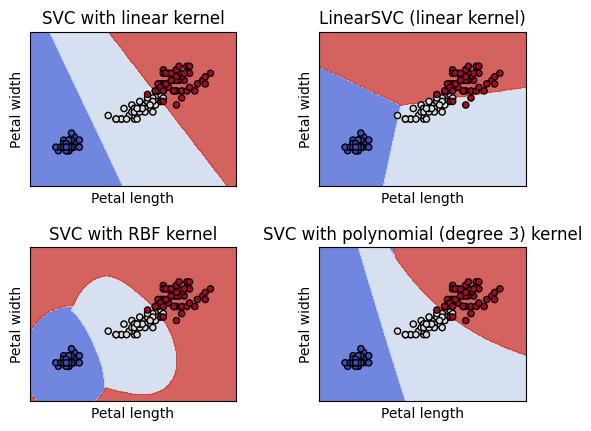

In [ ]:
# Import some data to play with
X = iris.data.iloc[:, 2:].to_numpy()   # we only take the last two features. We could avoid this ugly slicing by using a two-dim dataset
y = iris.target 

# We create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y) # C is the SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# Create a mesh to plot decision boundaries
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8) # plot decision boundary

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k',)

    # title for the plots
    titles = ['SVC with linear kernel',
            'LinearSVC (linear kernel)',
            'SVC with RBF kernel',
            'SVC with polynomial (degree 3) kernel']

    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()